In [1]:
import torch
import torchvision
import PIL

In [2]:
loader=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

In [258]:
unloader=torchvision.transforms.Compose([torchvision.transforms.ToPILImage(),torchvision.transforms.Resize((2048,1024))])

In [4]:
def get_image(path):
    image=PIL.Image.open(path)
    im=loader(image)
    im=im.unsqueeze(0)
    return im

In [5]:
im=get_image('Images/ESP_059738_2050.jpg')

In [105]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.ll=torch.nn.Conv2d(1,1,5,2)
    def forward(self,image):
        image=self.ll(image)
        print(self.ll)
        return image

In [141]:
net=Net()

In [149]:
f=net(im)

Conv2d(1, 1, kernel_size=(5, 5), stride=(2, 2))


In [150]:
f.size()

torch.Size([1, 1, 2835, 1022])

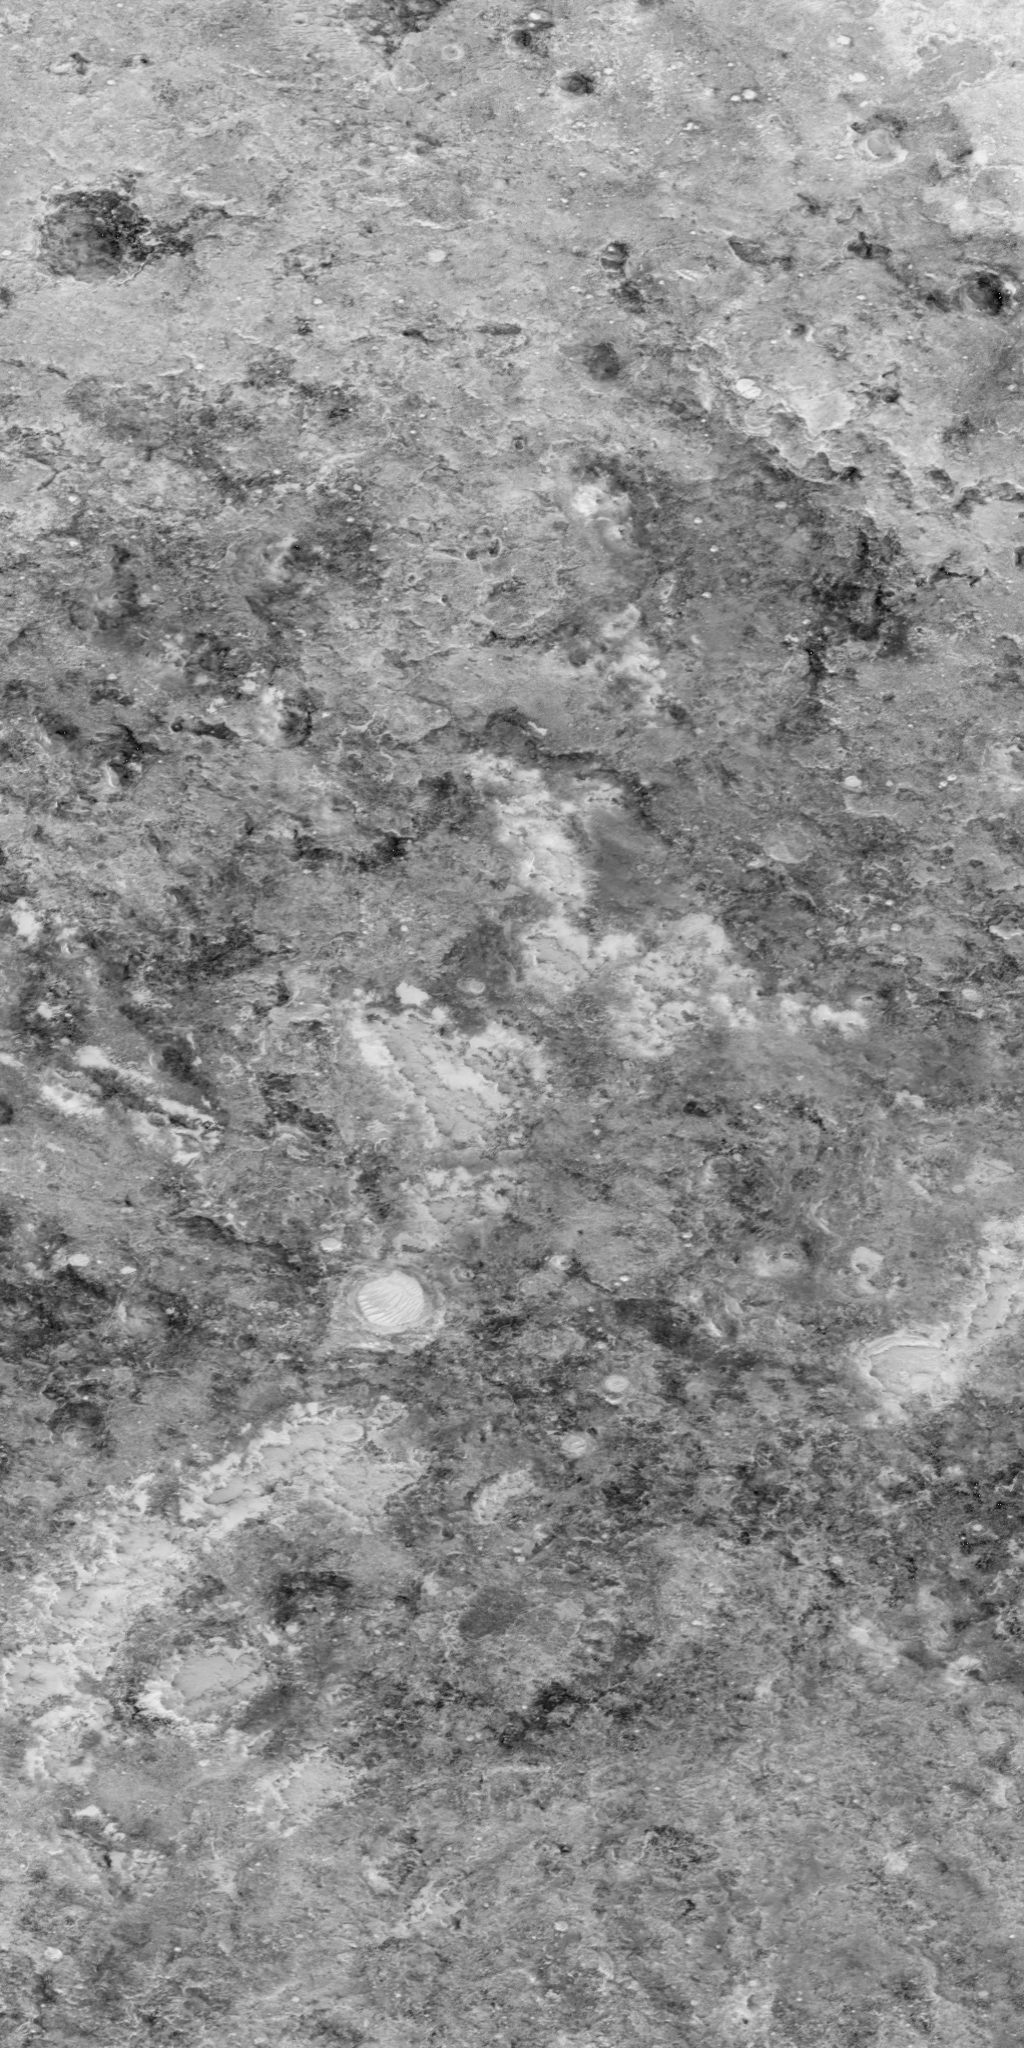

In [259]:
unloader(f[0][0].unsqueeze(0))

In [278]:
img=get_image('Images/ESP_059713_1720.jpg')

In [287]:
x=net(img)

Conv2d(1, 1, kernel_size=(5, 5), stride=(2, 2))


In [283]:
realImage=unloader(img[0])

In [288]:
file=unloader(x[0][0].unsqueeze(0))

In [289]:
file.save('final.jpeg')

In [264]:
import cv2

In [265]:
image=cv2.imread('final.jpeg',cv2.COLOR_RGB2BGR)

In [266]:
i=cv2.Canny(image,100,100)

In [267]:
import matplotlib.pyplot as plt

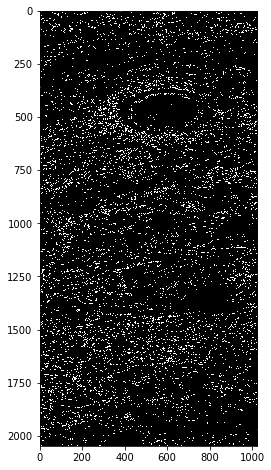

In [268]:
plt.figure(figsize=(16,8))
plt.imshow(i,cmap='gray')

In [269]:
def process_img(original_image):
    processed_img = cv2.Canny(original_image, threshold1=100, threshold2=200)
    return processed_img


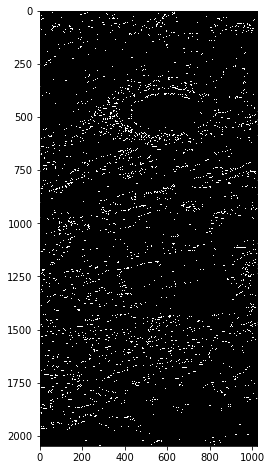

In [270]:
plt.figure(figsize=(16,8))
plt.imshow(process_img(image),cmap='gray')

In [199]:
def findEdges(image,kernal=9):
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=kernal)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=kernal)
    return sobelx,sobely

In [227]:
imx,imy=findEdges(image,9)

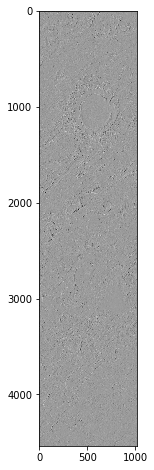

In [228]:
plt.figure(figsize=(16,8))
plt.imshow(imx,cmap='gray')

In [229]:
import numpy as np

cv2.imwrite('edge.jpeg',imy)

True

In [218]:
from PIL import Image

In [290]:
img=Image.open('final.jpeg')

In [291]:
img.size

(1024, 2048)

In [292]:
for i in range(1,100):
    if 4537%i== 0:
        print(i)

1
13


In [293]:
4537/13

349.0

In [294]:
def crop(im,filepath,width,height):
    imwidth,imheight=im.size
    count=0
    for i in range(0,imwidth,width):
        for j in range(0,imheight,height):
            #print(j)
            box=(i,j,i+width,j+height)
            img=im.crop(box)
            img.save(filepath+str(count)+'.jpg')
            count+=1

In [295]:
crop(img,'',1024,512)

In [297]:
crop(realImage,'Crop3parts/real_',1024,512)